In [1]:
#We'll be using K-means as a form of clustering to determine the brand of a car
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial

%matplotlib inline

In [2]:
dataset = pd.read_csv(r'C:\Users\shee\Desktop\Machine Learning Projects\Cars with KNN\cars.csv')
dataset.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
X = dataset.iloc[:,:-1].values

In [4]:
X.drop(X.columns[[4, 2]], axis = 1, inplace = True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [5]:
X = pd.DataFrame(X)
X.apply(pd.to_numeric, errors='ignore').dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
dtype: object

In [6]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0


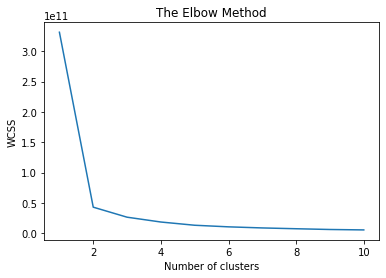

In [7]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[3 3 4 4 1 3 5 3 6 0 5 2 5 3 1 8 0 5 3 3 3 3 1 4 4 1 3 5 6 0 0 8 3 6 5 1 1
 3 9 5 9 3 3 1 9 9 9 8 2 1 6 1 5 8 3 5 2 3 5 0 1 0 8 9 2 3 1 7 0 5 3 3 0 3
 3 8 6 0 1 5 9 6 3 1 5 8 6 8 6 0 4 3 5 1 9 4 4 1 1 5 4 2 4 3 7 2 9 1 6 3 5
 9 1 2 5 6 9 0 7 3 9 0 1 8 7 1 8 7 5 5 3 1 5 0 3 4 4 3 3 1 9 6 3 3 3 6 5 1
 7 9 6 3 4 1 6 1 5 1 3 9 8 5 0 1 4 1 3 4 7 1 0 0 6 4 3 9 3 5 3 1 9 4 9 7 5
 3 3 8 1 6 8 2 5 3 5 1 8 1 3 8 1 8 3 3 5 8 1 3 3 3 1 5 5 9 3 4 6 1 3 5 6 1
 8 8 1 9 5 2 9 8 5 3 1 5 9 3 7 8 1 5 7 5 9 9 8 5 1 8 3 6 5 9 8 1 1 3 6 8 1
 5 1 8 5 1 6 0 3 5 8 1 3 0 1 3 4 7 7 5 4 5 6 7 5 8 6 8 8 6 5 5 5 3 9 9 8 7
 5 1 6 4 3 9 5 4 6 8 5 1 0 6 0 5 8 5 9 1 3 1 1 7 5 9 3 1 9 5 6 0 3 5 5 3 0
 9 3 9 5 3 1 1 1 3 5 1 5 7 3 1 1 4 6 5 4 4 3 9 9 1 3 2 3 3 3 0 1 9 5 2 2 3
 2 1 6 5 1 5 9 3 1 5 5 3 5 6 9 5 8 9 1 7 3 3 6 2 3 3 6 6 1 1 5 9 1 5 3 1 9
 1 3 1 7 0 5 3 9 3 8 9 3 3 0 3 5 6 9 6 5 2 8 4 1 1 1 3 3 4 3 3 1 6 4 8 1 3
 7 3 3 1 3 9 1 1 3 3 8 3 4 1 1 4 2 1 3 3 0 5 9 5 5 8 0 4 5 0 3 3 1 8 3 5 0
 3 3 4 5 3 9 0 1 9 3 3 3 

In [41]:
plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

KeyError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False]), 0)